# <strong> A - Importation de modules importants </strong>

Forcer tensorflow à utiliser le CPU

import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics, preprocessing

###########################################
import import_ipynb
from Brice_KENGNI_ZANGUIM_2_1_script_functions_17_08_2022 import *

importing Jupyter notebook from Brice_KENGNI_ZANGUIM_2_1_script_functions_17_08_2022.ipynb


# <strong> B - Chargement des données sous forme vectorielle ainsi que des labels </strong>

In [2]:
data = {}
for embd_alg in ["USE_embed","InferSent_embed"] :
    data[embd_alg] = {}
    for data_name in [ "test_data","train_data"] :
        data[embd_alg][data_name] = {}
        for proc in ["lemma", "stem"] :
            data[embd_alg][data_name][proc] = pd.read_csv(f"{embd_alg}_{data_name}_{proc}.csv")

In [3]:
True_label = {
            "train_stem" : pd.read_csv("train_data_stem.csv").labels.values,
            "test_stem" : pd.read_csv("test_data_stem.csv").labels.values,
            #"validation_stem" : pd.read_csv("validation_data_stem.csv").labels.values,
            "train_lemma" : pd.read_csv("train_data_lemma.csv").labels.values,
            "test_lemma" : pd.read_csv("test_data_lemma.csv").labels.values,
            #"validation_lemma" : pd.read_csv("validation_data_lemma.csv").labels.values 
              }

# <strong> C - Modèle simple : Artificial Neural Network </strong>

#### Sur le choix de la <strong> meilleur méthode de processesing  </strong> de texte : `lemmatisation` ou `Stematisation`  avec représentation vectorielle de phrases par la méthode <strong> Universal Sentence Encoder ( USE ) </strong>

* ### <strong> Définition des caractéristiques du réseau de neuronnes </strong>

In [4]:
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf

In [5]:
model_nn_USE = {}

In [6]:
model_nn_USE["lemma"]= Sequential()

model_nn_USE["lemma"].add( keras.layers.Dense( 1024 , activation='relu' ) )
model_nn_USE["lemma"].add( keras.layers.Dense( 1, activation='sigmoid' ) ) 

#Add loss function, metrics, optimizer
model_nn_USE["lemma"].compile( optimizer = 'adam', loss = 'binary_crossentropy', metrics = [ "acc" ] ) 

* ### <strong> Entrainement et comparaison des perfermances </strong>

* * ### <strong> Lematisation </strong>

In [7]:
model_nn_USE["lemma"].fit( data["USE_embed"]["train_data"]["lemma"], True_label["train_lemma"], epochs = 25, batch_size = 500, 
                          validation_split = 0.10, use_multiprocessing = True )

Epoch 1/25
35/35 [==============================] - 3s 13ms/step - loss: 0.5951 - acc: 0.6777 - val_loss: 0.6716 - val_acc: 0.6249
Epoch 2/25
35/35 [==============================] - 0s 7ms/step - loss: 0.5344 - acc: 0.7332 - val_loss: 0.6879 - val_acc: 0.6165
Epoch 3/25
35/35 [==============================] - 0s 7ms/step - loss: 0.5237 - acc: 0.7417 - val_loss: 0.6662 - val_acc: 0.6454
Epoch 4/25
35/35 [==============================] - 0s 7ms/step - loss: 0.5162 - acc: 0.7470 - val_loss: 0.5891 - val_acc: 0.6923
Epoch 5/25
35/35 [==============================] - 0s 7ms/step - loss: 0.5072 - acc: 0.7516 - val_loss: 0.6453 - val_acc: 0.6597
Epoch 6/25
35/35 [==============================] - 0s 7ms/step - loss: 0.4972 - acc: 0.7580 - val_loss: 0.6407 - val_acc: 0.6612
Epoch 7/25
35/35 [==============================] - 0s 7ms/step - loss: 0.4852 - acc: 0.7697 - val_loss: 0.6004 - val_acc: 0.6849
Epoch 8/25
35/35 [==============================] - 0s 7ms/step - loss: 0.4732 - acc: 0.7

In [8]:
predict_labels = {}

predict_labels["lemma"] = model_nn_USE["lemma"].predict(data["USE_embed"]["test_data"]["lemma"])

60/60 [==============================] - 0s 2ms/step


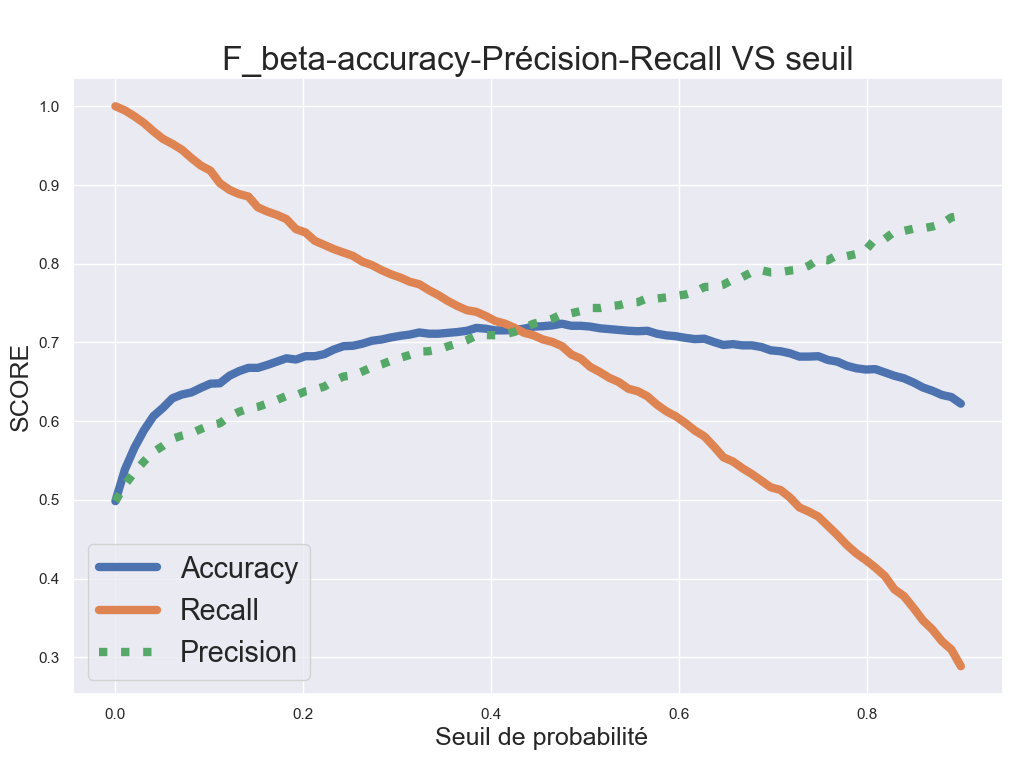

In [9]:
print_scores( Y_true= True_label["test_lemma"].ravel(), Y_proba= predict_labels["lemma"].ravel() , plot_kind="apr" )

In [10]:
Y_lbl_prdct = prediction_function_threshold(Y_proba=predict_labels["lemma"], seuil=0.43).ravel()

In [11]:
print( metrics.classification_report( True_label["test_lemma"] , Y_lbl_prdct ) )

              precision    recall  f1-score   support

           0       0.72      0.72      0.72       948
           1       0.72      0.72      0.72       942

    accuracy                           0.72      1890
   macro avg       0.72      0.72      0.72      1890
weighted avg       0.72      0.72      0.72      1890



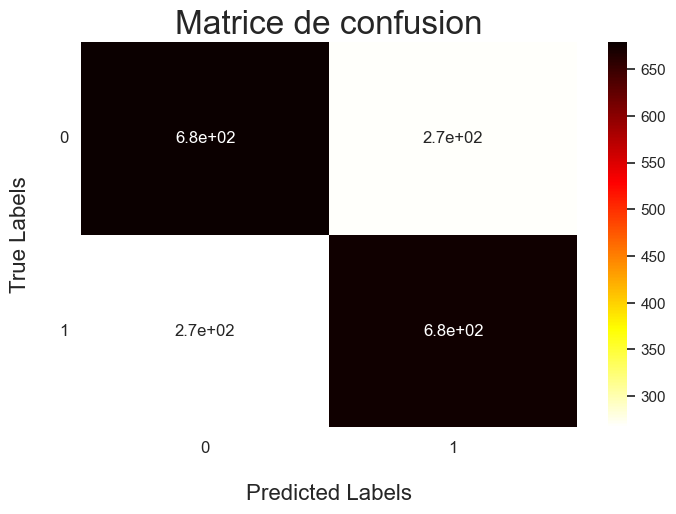

In [12]:
plot_confusion_matrix(True_label["test_lemma"] , Y_lbl_prdct, figsize=(8,5))

* * ### <strong> Stematisation </strong>

In [13]:
model_nn_USE["stem"]= Sequential()

model_nn_USE["stem"].add( keras.layers.Dense( 1024 , activation='relu' ) )
model_nn_USE["stem"].add( keras.layers.Dense( 1, activation='sigmoid' ) ) 

#Add loss function, metrics, optimizer
model_nn_USE["stem"].compile( optimizer = 'adam', loss = 'binary_crossentropy', metrics = [ "acc" ] ) 

In [14]:
model_nn_USE["stem"].fit( data["USE_embed"]["train_data"]["stem"] , True_label["train_stem"] , epochs = 25 , batch_size = 500 , 
                          validation_split = 0.10 , use_multiprocessing = True )

Epoch 1/25
35/35 [==============================] - 1s 16ms/step - loss: 0.6065 - acc: 0.6545 - val_loss: 0.6204 - val_acc: 0.6616
Epoch 2/25
35/35 [==============================] - 0s 10ms/step - loss: 0.5499 - acc: 0.7147 - val_loss: 0.6725 - val_acc: 0.6199
Epoch 3/25
35/35 [==============================] - 0s 7ms/step - loss: 0.5377 - acc: 0.7242 - val_loss: 0.7202 - val_acc: 0.5876
Epoch 4/25
35/35 [==============================] - 0s 7ms/step - loss: 0.5296 - acc: 0.7316 - val_loss: 0.5794 - val_acc: 0.7028
Epoch 5/25
35/35 [==============================] - 0s 7ms/step - loss: 0.5188 - acc: 0.7394 - val_loss: 0.6149 - val_acc: 0.6757
Epoch 6/25
35/35 [==============================] - 0s 8ms/step - loss: 0.5070 - acc: 0.7475 - val_loss: 0.6699 - val_acc: 0.6272
Epoch 7/25
35/35 [==============================] - 0s 7ms/step - loss: 0.4941 - acc: 0.7591 - val_loss: 0.5970 - val_acc: 0.6893
Epoch 8/25
35/35 [==============================] - 0s 7ms/step - loss: 0.4798 - acc: 0.

In [15]:
predict_labels = {}

predict_labels["stem"] = model_nn_USE["stem"].predict(data["USE_embed"]["test_data"]["stem"])

60/60 [==============================] - 0s 2ms/step


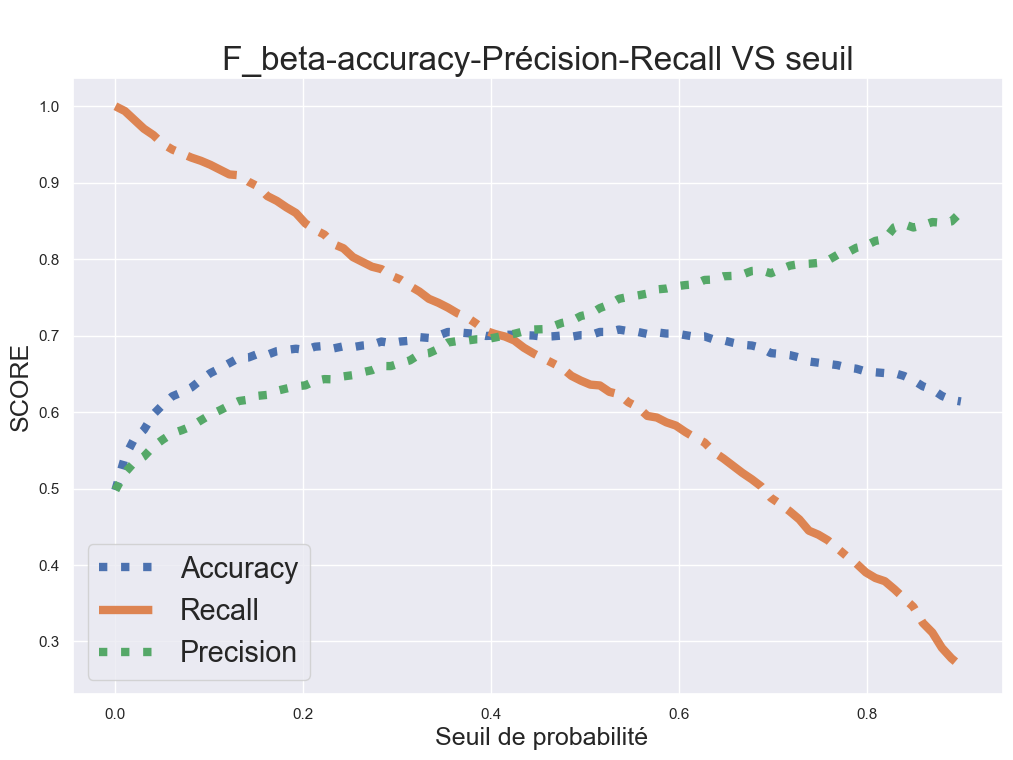

In [16]:
print_scores( Y_true= True_label["test_stem"].ravel(), Y_proba= predict_labels["stem"].ravel() , plot_kind="apr" )

In [17]:
Y_lbl_prdct = prediction_function_threshold(Y_proba=predict_labels["stem"], seuil=0.43).ravel()

In [18]:
print( metrics.classification_report( True_label["test_stem"] , Y_lbl_prdct ) )

              precision    recall  f1-score   support

           0       0.70      0.71      0.71       961
           1       0.70      0.69      0.70       953

    accuracy                           0.70      1914
   macro avg       0.70      0.70      0.70      1914
weighted avg       0.70      0.70      0.70      1914



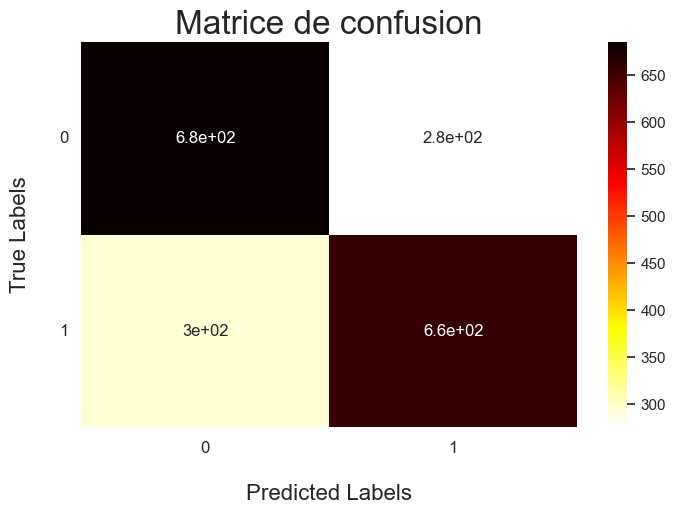

In [19]:
plot_confusion_matrix(True_label["test_stem"] , Y_lbl_prdct, figsize=(8,5))